In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("klemenko/kitti-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/kitti-dataset


In [2]:
import os
print(os.listdir(path))

['data_object_calib', 'data_object_image_2', 'data_object_label_2', 'data_object_image_3']


Dataset Organization and Split


In [3]:
import os
import shutil
import random

# Define paths
dataset_path = path  # Your dataset folder
images_src = os.path.join(dataset_path, "data_object_image_2/training/image_2")  # Image folder
labels_src = os.path.join(dataset_path, "data_object_label_2/training/label_2")  # Label folder

# Define new dataset structure
output_dir = "data"
train_images_dir = os.path.join(output_dir, "train/images")
train_labels_dir = os.path.join(output_dir, "train/labels")
val_images_dir = os.path.join(output_dir, "val/images")
val_labels_dir = os.path.join(output_dir, "val/labels")

# Create necessary directories
for dir_path in [train_images_dir, train_labels_dir, val_images_dir, val_labels_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Get a list of image files
image_files = [f for f in os.listdir(images_src) if f.endswith(".png")]
image_files.sort()  # Ensure consistent order

# Shuffle and split data
random.seed(42)  # For reproducibility
random.shuffle(image_files)

split_idx = int(len(image_files) * 0.8)  # 80% train, 20% val
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# Function to move files
def move_files(file_list, src_folder, dest_folder, ext):
    for file in file_list:
        file_name = os.path.splitext(file)[0]  # Remove .png extension
        src_file = os.path.join(src_folder, file_name + ext)
        dest_file = os.path.join(dest_folder, file_name + ext)
        if os.path.exists(src_file):  # Move only if file exists
            shutil.copy(src_file, dest_file)

# Move train images and labels
move_files(train_files, images_src, train_images_dir, ".png")
move_files(train_files, labels_src, train_labels_dir, ".txt")

# Move validation images and labels
move_files(val_files, images_src, val_images_dir, ".png")
move_files(val_files, labels_src, val_labels_dir, ".txt")

print("✅ Dataset organized successfully!")


✅ Dataset organized successfully!


Verify Dataset Structure and File Counts

In [4]:
import os
import shutil
import random

# Define paths
dataset_path = path  # Your dataset folder
images_src = os.path.join(dataset_path, "data_object_image_2/training/image_2")  # Image folder
labels_src = os.path.join(dataset_path, "data_object_label_2/training/label_2")  # Label folder

# Define new dataset structure
output_dir = "data"
train_images_dir = os.path.join(output_dir, "train/images")
train_labels_dir = os.path.join(output_dir, "train/labels")
val_images_dir = os.path.join(output_dir, "val/images")
val_labels_dir = os.path.join(output_dir, "val/labels")

# Create necessary directories
for dir_path in [train_images_dir, train_labels_dir, val_images_dir, val_labels_dir]:
    os.makedirs(dir_path, exist_ok=True)

# Get a list of image files
image_files = [f for f in os.listdir(images_src) if f.endswith(".png")]
image_files.sort()  # Ensure consistent order

# Shuffle and split data
random.seed(42)  # For reproducibility
random.shuffle(image_files)

split_idx = int(len(image_files) * 0.8)  # 80% train, 20% val
train_files = image_files[:split_idx]
val_files = image_files[split_idx:]

# Function to move files
def move_files(file_list, src_folder, dest_folder, ext):
    for file in file_list:
        file_name = os.path.splitext(file)[0]  # Remove .png extension
        src_file = os.path.join(src_folder, file_name + ext)
        dest_file = os.path.join(dest_folder, file_name + ext)
        if os.path.exists(src_file):  # Move only if file exists
            shutil.copy(src_file, dest_file)

# Move train images and labels
move_files(train_files, images_src, train_images_dir, ".png")
move_files(train_files, labels_src, train_labels_dir, ".txt")

# Move validation images and labels
move_files(val_files, images_src, val_images_dir, ".png")
move_files(val_files, labels_src, val_labels_dir, ".txt")

print("✅ Dataset organized successfully!")

##%%
import os

# Define the main dataset folder
data_dir = "data"
train_dir = os.path.join(data_dir, "train")
val_dir = os.path.join(data_dir, "val")

# Check if "data" folder exists
if os.path.exists(data_dir) and os.path.isdir(data_dir):
    print("✅ The 'data' folder exists in the working directory!")
    
    # List contents of "data" folder
    print("\n📂 Contents of 'data':", os.listdir(data_dir))
    
    # Check contents inside "train" and "val" folders
    if os.path.exists(train_dir):
        print("\n📂 Contents of 'train':", os.listdir(train_dir))
    else:
        print("\n❌ 'train' folder not found inside 'data'.")

    if os.path.exists(val_dir):
        print("\n📂 Contents of 'val':", os.listdir(val_dir))
    else:
        print("\n❌ 'val' folder not found inside 'data'.")

    # Count number of files in train/images and train/labels
    train_images_dir = os.path.join(train_dir, "images")
    train_labels_dir = os.path.join(train_dir, "labels")

    if os.path.exists(train_images_dir):
        num_train_images = len([f for f in os.listdir(train_images_dir) if os.path.isfile(os.path.join(train_images_dir, f))])
        print(f"📸 Number of train images: {num_train_images}")
    else:
        print("❌ Train images folder not found.")

    if os.path.exists(train_labels_dir):
        num_train_labels = len([f for f in os.listdir(train_labels_dir) if os.path.isfile(os.path.join(train_labels_dir, f))])
        print(f"📝 Number of train labels: {num_train_labels}")
    else:
        print("❌ Train labels folder not found.")

    # Count number of files in val/images and val/labels
    val_images_dir = os.path.join(val_dir, "images")
    val_labels_dir = os.path.join(val_dir, "labels")

    if os.path.exists(val_images_dir):
        num_val_images = len([f for f in os.listdir(val_images_dir) if os.path.isfile(os.path.join(val_images_dir, f))])
        print(f"📸 Number of val images: {num_val_images}")
    else:
        print("❌ Val images folder not found.")

    if os.path.exists(val_labels_dir):
        num_val_labels = len([f for f in os.listdir(val_labels_dir) if os.path.isfile(os.path.join(val_labels_dir, f))])
        print(f"📝 Number of val labels: {num_val_labels}")
    else:
        print("❌ Val labels folder not found.") 

else:
    print("❌ The 'data' folder is NOT in the working directory.")


✅ Dataset organized successfully!
✅ The 'data' folder exists in the working directory!

📂 Contents of 'data': ['train', 'val']

📂 Contents of 'train': ['images', 'labels']

📂 Contents of 'val': ['images', 'labels']
📸 Number of train images: 5984
📝 Number of train labels: 5984
📸 Number of val images: 1497
📝 Number of val labels: 1497


Convert KITTI Labels to YOLO Format

In [5]:
import os

# Path to dataset
dataset_path = "data"

# Function to find all unique class names
def find_unique_classes(labels_path):
    unique_classes = set()
    
    for split in ["train", "val"]:
        labels_dir = os.path.join(labels_path, split, "labels")
        
        for label_file in os.listdir(labels_dir):
            label_path = os.path.join(labels_dir, label_file)
            
            with open(label_path, "r") as file:
                lines = file.readlines()
            
            for line in lines:
                class_name = line.strip().split()[0]  # Get class name
                if class_name != "DontCare":  # Ignore "DontCare" objects
                    unique_classes.add(class_name)
    
    return sorted(list(unique_classes))  # Sort for consistency

# Step 1: Find all unique classes
unique_classes = find_unique_classes(dataset_path)

# Step 2: Assign a unique class ID for YOLO
class_mapping = {name: idx for idx, name in enumerate(unique_classes)}

# Function to convert KITTI labels to YOLO format
def convert_kitti_to_yolo(label_path, image_width=1242, image_height=375):
    yolo_labels = []
    
    with open(label_path, "r") as file:
        lines = file.readlines()
    
    for line in lines:
        parts = line.strip().split()
        
        class_name = parts[0]
        if class_name == "DontCare":
            continue  # Skip DontCare objects
        
        class_id = class_mapping.get(class_name, None)
        if class_id is None:
            continue  # Ignore unlisted classes

        # Extract bounding box (xmin, ymin, xmax, ymax)
        xmin, ymin, xmax, ymax = map(float, parts[4:8])

        # Convert to YOLO format (normalized)
        x_center = ((xmin + xmax) / 2) / image_width
        y_center = ((ymin + ymax) / 2) / image_height
        width = (xmax - xmin) / image_width
        height = (ymax - ymin) / image_height

        # Store in YOLO format
        yolo_labels.append(f"{class_id} {x_center:.6f} {y_center:.6f} {width:.6f} {height:.6f}")

    return yolo_labels

# Step 3: Process all label files in train and val folders
for split in ["train", "val"]:
    labels_dir = os.path.join(dataset_path, split, "labels")
    
    for label_file in os.listdir(labels_dir):
        label_path = os.path.join(labels_dir, label_file)
        
        # Convert labels
        yolo_labels = convert_kitti_to_yolo(label_path)
        
        # Save back in YOLO format
        with open(label_path, "w") as file:
            file.write("\n".join(yolo_labels))

# Step 4: Output the class mappings
print("✅ KITTI labels successfully converted to YOLO format!")
print("\n📌 Found classes and assigned YOLO class IDs:")
for class_name, class_id in class_mapping.items():
    print(f"  - {class_name} → {class_id}")


✅ KITTI labels successfully converted to YOLO format!

📌 Found classes and assigned YOLO class IDs:
  - Car → 0
  - Cyclist → 1
  - Misc → 2
  - Pedestrian → 3
  - Person_sitting → 4
  - Tram → 5
  - Truck → 6
  - Van → 7


In [6]:
import os

# Define paths to label directories
train_labels_dir = "data/train/labels"
val_labels_dir = "data/val/labels"

# Correct YOLO class mapping
class_mapping = {
    "Car": 0,
    "Cyclist": 1,
    "Misc": 2,
    "Pedestrian": 3,
    "Person_sitting": 4,
    "Tram": 5,
    "Truck": 6,
    "Van": 7
}

# Function to count occurrences of each class in YOLO labels
def get_class_counts(label_dir):
    class_counts = {id_: 0 for id_ in class_mapping.values()}  # Initialize counts

    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)

        with open(label_path, "r") as file:
            lines = file.readlines()

        for line in lines:
            parts = line.strip().split()
            if len(parts) > 0:
                class_id = int(parts[0])  # Extract class ID
                
                # Count occurrences
                if class_id in class_counts:
                    class_counts[class_id] += 1
                else:
                    class_counts[class_id] = 1

    return class_counts

# Function to get unique classes
def get_unique_classes(label_dir):
    unique_classes = set()

    for label_file in os.listdir(label_dir):
        label_path = os.path.join(label_dir, label_file)

        with open(label_path, "r") as file:
            lines = file.readlines()

        for line in lines:
            parts = line.strip().split()
            if len(parts) > 0:
                class_id = int(parts[0])  # Extract class ID
                unique_classes.add(class_id)

    return unique_classes

# Get unique class IDs from both train and val datasets
train_classes = get_unique_classes(train_labels_dir)
val_classes = get_unique_classes(val_labels_dir)

# Combine unique classes from both sets
all_unique_classes = train_classes.union(val_classes)

# Get class occurrences in the train set
train_class_counts = get_class_counts(train_labels_dir)

# Reverse mapping: Convert YOLO class IDs back to names
reverse_class_mapping = {v: k for k, v in class_mapping.items()}

# Output results
print("✅ KITTI labels successfully converted to YOLO format!\n")
print("📌 Found classes and assigned YOLO class IDs:")

for class_id in sorted(all_unique_classes):
    class_name = reverse_class_mapping.get(class_id, f"Unknown_{class_id}")
    count = train_class_counts.get(class_id, 0)
    print(f"  - {class_name} → {class_id} ({count} instances in train set)")

✅ KITTI labels successfully converted to YOLO format!

📌 Found classes and assigned YOLO class IDs:
  - Car → 0 (23062 instances in train set)
  - Cyclist → 1 (1321 instances in train set)
  - Misc → 2 (778 instances in train set)
  - Pedestrian → 3 (3591 instances in train set)
  - Person_sitting → 4 (192 instances in train set)
  - Tram → 5 (412 instances in train set)
  - Truck → 6 (896 instances in train set)
  - Van → 7 (2351 instances in train set)


Plot YOLO Labels on Images

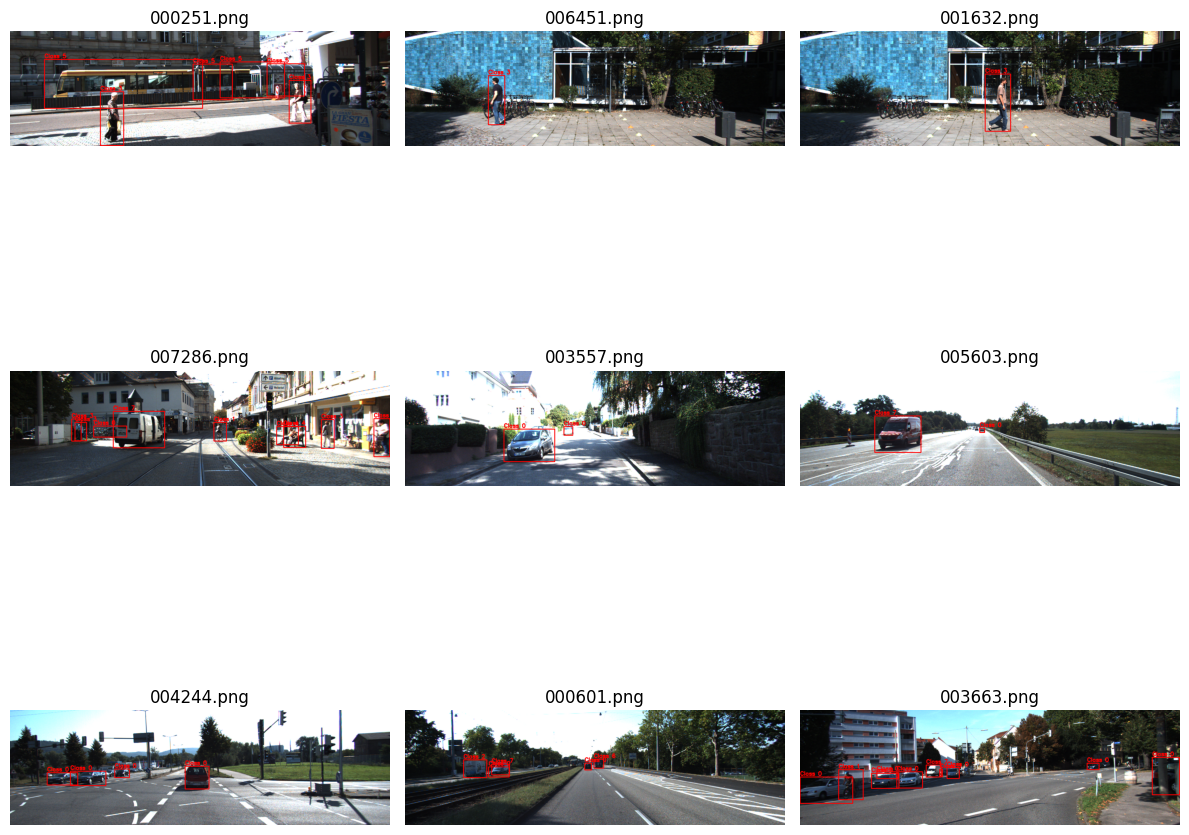

In [7]:
import random
import cv2
import matplotlib.pyplot as plt

def plot_random_images_with_boxes(split="train"):
    """
    Selects 9 random images from train or val and plots them with bounding boxes.
    :param split: "train" or "val" to choose from the respective dataset.
    """
    # Define paths
    images_dir = f"data/{split}/images"
    labels_dir = f"data/{split}/labels"

    # Get list of image files
    image_files = [f for f in os.listdir(images_dir) if f.endswith(".png")]
    
    if len(image_files) < 9:
        print("❌ Not enough images to plot (need at least 9).")
        return
    
    # Randomly select 9 images
    selected_images = random.sample(image_files, 9)

    # Create 3x3 plot
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))

    for idx, img_file in enumerate(selected_images):
        # Load image
        img_path = os.path.join(images_dir, img_file)
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for proper display
        
        # Load corresponding label file
        label_file = os.path.splitext(img_file)[0] + ".txt"
        label_path = os.path.join(labels_dir, label_file)

        if os.path.exists(label_path):
            with open(label_path, "r") as f:
                lines = f.readlines()

            # Image dimensions
            h, w, _ = image.shape
            
            # Draw bounding boxes
            for line in lines:
                parts = line.strip().split()
                if len(parts) != 5:
                    continue  # Skip invalid lines

                class_id, x_center, y_center, width, height = map(float, parts)
                
                # Convert YOLO format (normalized) to pixel coordinates
                x_min = int((x_center - width / 2) * w)
                y_min = int((y_center - height / 2) * h)
                x_max = int((x_center + width / 2) * w)
                y_max = int((y_center + height / 2) * h)

                # Draw rectangle
                cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
                cv2.putText(image, f"Class {int(class_id)}", (x_min, y_min - 5),
                            cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 0, 0), 2)

        # Plot image in 3x3 grid
        ax = axes[idx // 3, idx % 3]
        ax.imshow(image)
        ax.axis("off")
        ax.set_title(img_file)

    plt.tight_layout()
    plt.show()

# Example usage: plot 9 random images from "train" or "val"
plot_random_images_with_boxes("train")  # Change to "val" for validation data

Generate YOLO Dataset YAML

In [8]:
# Updated YAML content with all 8 classes
yaml_content = """  
path: /kaggle/working/data
train: train/images
val: val/images

nc: 8  # Number of classes
names: ['Car', 'Cyclist', 'Misc', 'Pedestrian', 'Person_sitting', 'Tram', 'Truck', 'Van']
"""

# Define the YAML file path
yaml_path = "/kaggle/working/data/dataset.yaml"

# Write the YAML file
with open(yaml_path, "w") as file:
    file.write(yaml_content)

# Print confirmation message
print(f"✅ 'dataset.yaml' file created successfully at: {yaml_path}")

✅ 'dataset.yaml' file created successfully at: /kaggle/working/data/dataset.yaml


In [9]:
# Install Ultralytics package (contains YOLOv8)
!pip install ultralytics > /dev/null 2>&1

# Check if installation was successful
import ultralytics
print(f"✅ Ultralytics installed successfully! Version: {ultralytics.__version__}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
✅ Ultralytics installed successfully! Version: 8.3.78


YOLOv8n training

In [10]:
from ultralytics import YOLO
import os

# Create output directory
output_dir = "runs/train/kitti_yolo_v8"
os.makedirs(output_dir, exist_ok=True)

# Load YOLOv8n model (pre-trained weights)
model = YOLO("yolov8n.pt")

# Train the model
results = model.train(
    data="/kaggle/working/data/dataset.yaml",  # Path to dataset.yaml
    imgsz=640,  # Image size
    epochs=50,  # Number of epochs
    batch=16,  # Adjust based on GPU memory
    name="kitti_yolo_v8",  # Experiment name
    save=True,  # Save model weights
    save_period=5,  # Save weights every 5 epochs
    project="runs/train",  # Path where logs and weights will be stored
    exist_ok=True  # Avoid overwriting existing results
)

print("✅ Training complete! Check saved weights and logs at:", output_dir)


100%|██████████| 6.25M/6.25M [00:00<00:00, 81.8MB/s]


Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/data/dataset.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=5, cache=False, device=None, workers=8, project=runs/train, name=kitti_yolo_v8, exist_ok=True, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_co

100%|██████████| 755k/755k [00:00<00:00, 18.4MB/s]


Overriding model.yaml nc=80 with nc=8

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 77.3MB/s]


AMP: checks passed ✅


train: Scanning /kaggle/working/data/train/labels... 5984 images, 0 backgrounds, 0 corrupt: 100%|██████████| 5984/5984 [00:34<00:00, 172.46it/s]


train: New cache created: /kaggle/working/data/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.4 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /kaggle/working/data/val/labels... 1497 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1497/1497 [00:08<00:00, 179.22it/s]


val: New cache created: /kaggle/working/data/val/labels.cache
Plotting labels to runs/train/kitti_yolo_v8/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000833, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/train/kitti_yolo_v8
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      2.27G      1.425      1.784      1.108        209        640: 100%|██████████| 374/374 [01:25<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.73it/s]


                   all       1497       7967      0.409      0.395      0.373       0.22

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      2.06G      1.288      1.182      1.072        163        640: 100%|██████████| 374/374 [01:22<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.25it/s]


                   all       1497       7967      0.474       0.43      0.431      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      2.16G      1.261       1.08      1.065        144        640: 100%|██████████| 374/374 [01:23<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.08it/s]


                   all       1497       7967      0.536      0.485      0.512      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50       2.3G      1.221     0.9789      1.052        191        640: 100%|██████████| 374/374 [01:27<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  3.99it/s]


                   all       1497       7967      0.591      0.512       0.52      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      2.19G      1.184     0.9201      1.038        186        640: 100%|██████████| 374/374 [01:22<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.38it/s]


                   all       1497       7967      0.658      0.501      0.565      0.352

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      2.17G      1.154     0.8647      1.029        167        640: 100%|██████████| 374/374 [01:22<00:00,  4.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]


                   all       1497       7967      0.732      0.518       0.61       0.37

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      2.36G       1.14      0.839      1.022        205        640: 100%|██████████| 374/374 [01:23<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  3.95it/s]


                   all       1497       7967      0.649      0.552       0.62      0.391

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      2.21G       1.12     0.8127      1.016        158        640: 100%|██████████| 374/374 [01:27<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.05it/s]


                   all       1497       7967      0.711      0.559       0.63      0.394

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      2.25G      1.102     0.7943      1.007        141        640: 100%|██████████| 374/374 [01:24<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.31it/s]


                   all       1497       7967      0.682      0.587      0.638      0.398

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      2.15G      1.086     0.7739      1.003        178        640: 100%|██████████| 374/374 [01:24<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  3.98it/s]

                   all       1497       7967      0.694      0.558      0.647      0.413



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      2.25G       1.07      0.754     0.9965        201        640: 100%|██████████| 374/374 [01:28<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]


                   all       1497       7967      0.718      0.608      0.675      0.439

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      2.34G      1.054     0.7331     0.9914        146        640: 100%|██████████| 374/374 [01:28<00:00,  4.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  3.94it/s]

                   all       1497       7967      0.764      0.599      0.696      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      2.17G      1.043     0.7178     0.9871        194        640: 100%|██████████| 374/374 [01:27<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.90it/s]


                   all       1497       7967      0.709      0.623      0.692      0.449

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      2.07G      1.038      0.711     0.9853        157        640: 100%|██████████| 374/374 [01:24<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  3.93it/s]


                   all       1497       7967      0.759      0.654      0.727      0.472

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      2.08G      1.029     0.7009      0.981        200        640: 100%|██████████| 374/374 [01:27<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  3.95it/s]


                   all       1497       7967      0.739      0.655      0.715      0.461

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      2.45G      1.015     0.6862     0.9754        128        640: 100%|██████████| 374/374 [01:22<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  3.93it/s]


                   all       1497       7967      0.735      0.636      0.725       0.47

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      2.25G       1.01     0.6797     0.9731        179        640: 100%|██████████| 374/374 [01:27<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.91it/s]

                   all       1497       7967      0.763      0.649      0.732      0.487



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      2.26G     0.9981     0.6685     0.9692        162        640: 100%|██████████| 374/374 [01:27<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.05it/s]


                   all       1497       7967      0.788      0.672      0.755      0.497

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      2.15G     0.9878     0.6595     0.9658        169        640: 100%|██████████| 374/374 [01:23<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]


                   all       1497       7967      0.839      0.631      0.744      0.501

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      2.15G     0.9775     0.6509      0.964        193        640: 100%|██████████| 374/374 [01:25<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.38it/s]


                   all       1497       7967      0.769      0.711      0.778      0.515

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50       2.2G     0.9744     0.6483     0.9623        202        640: 100%|██████████| 374/374 [01:27<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  3.98it/s]


                   all       1497       7967      0.818      0.684      0.782      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      2.18G     0.9701     0.6399     0.9582        177        640: 100%|██████████| 374/374 [01:26<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.33it/s]

                   all       1497       7967      0.845      0.687      0.784      0.519



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      2.18G     0.9529     0.6278     0.9526        168        640: 100%|██████████| 374/374 [01:23<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.15it/s]


                   all       1497       7967      0.795      0.669      0.772      0.517

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      2.19G     0.9449     0.6222     0.9507        184        640: 100%|██████████| 374/374 [01:22<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.03it/s]

                   all       1497       7967      0.826      0.698      0.786      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       2.2G     0.9472     0.6226     0.9513        231        640: 100%|██████████| 374/374 [01:25<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.40it/s]


                   all       1497       7967      0.826        0.7      0.793      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      2.26G     0.9342     0.6107     0.9479        151        640: 100%|██████████| 374/374 [01:27<00:00,  4.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.08it/s]


                   all       1497       7967      0.798      0.686      0.778      0.523

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      2.19G     0.9306     0.6061      0.946        132        640: 100%|██████████| 374/374 [01:27<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]


                   all       1497       7967      0.809      0.721      0.792      0.532

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      2.26G     0.9227     0.5964     0.9412        158        640: 100%|██████████| 374/374 [01:24<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.37it/s]


                   all       1497       7967      0.755      0.747        0.8      0.543

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      2.26G     0.9177     0.5979     0.9404        166        640: 100%|██████████| 374/374 [01:25<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.14it/s]


                   all       1497       7967      0.822      0.714      0.804      0.544

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      2.15G     0.9096     0.5891     0.9381        170        640: 100%|██████████| 374/374 [01:27<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.14it/s]


                   all       1497       7967      0.845      0.738       0.82      0.554

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      2.29G     0.9003     0.5765     0.9335        164        640: 100%|██████████| 374/374 [01:22<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.40it/s]


                   all       1497       7967      0.858      0.728      0.825      0.565

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      2.35G     0.8962     0.5773     0.9343        168        640: 100%|██████████| 374/374 [01:24<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.11it/s]


                   all       1497       7967      0.848      0.742       0.82      0.567

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      2.18G     0.8919     0.5742     0.9315        200        640: 100%|██████████| 374/374 [01:25<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.26it/s]


                   all       1497       7967      0.861       0.73      0.826      0.573

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      2.24G     0.8867     0.5674     0.9302        172        640: 100%|██████████| 374/374 [01:23<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.23it/s]


                   all       1497       7967      0.855      0.749      0.837       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      2.19G     0.8784     0.5655     0.9292        159        640: 100%|██████████| 374/374 [01:27<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.14it/s]


                   all       1497       7967      0.873      0.731      0.834       0.58

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      2.07G     0.8739     0.5566     0.9264        116        640: 100%|██████████| 374/374 [01:26<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.13it/s]


                   all       1497       7967      0.863      0.718      0.837      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      2.24G     0.8599     0.5497      0.922        153        640: 100%|██████████| 374/374 [01:24<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.24it/s]

                   all       1497       7967      0.864      0.753      0.842       0.59



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      2.23G     0.8613     0.5489     0.9212        192        640: 100%|██████████| 374/374 [01:23<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.09it/s]


                   all       1497       7967      0.819      0.767      0.842       0.59

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      2.05G     0.8559     0.5433     0.9212        207        640: 100%|██████████| 374/374 [01:24<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:10<00:00,  4.35it/s]


                   all       1497       7967      0.853      0.772      0.849        0.6

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      2.11G     0.8446     0.5376     0.9181        151        640: 100%|██████████| 374/374 [01:27<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]


                   all       1497       7967      0.873      0.769      0.854      0.599
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      2.04G     0.8342     0.5169     0.9105         90        640: 100%|██████████| 374/374 [01:27<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  3.99it/s]

                   all       1497       7967      0.854      0.761      0.845      0.591



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      2.04G     0.8072     0.4981     0.9029         98        640: 100%|██████████| 374/374 [01:20<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.27it/s]


                   all       1497       7967      0.875      0.741      0.847      0.593

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      2.02G     0.8006     0.4912     0.8999        110        640: 100%|██████████| 374/374 [01:21<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.08it/s]


                   all       1497       7967      0.877      0.759      0.855      0.594

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      2.04G     0.7922     0.4902     0.8964        102        640: 100%|██████████| 374/374 [01:25<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.09it/s]

                   all       1497       7967      0.858      0.761      0.849        0.6



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      2.02G     0.7838      0.484     0.8962         82        640: 100%|██████████| 374/374 [01:24<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.14it/s]


                   all       1497       7967      0.881      0.767      0.855      0.605

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      2.02G     0.7817     0.4798     0.8942         99        640: 100%|██████████| 374/374 [01:23<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.10it/s]


                   all       1497       7967      0.876      0.768      0.856       0.61

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      2.04G     0.7752     0.4759     0.8898         72        640: 100%|██████████| 374/374 [01:22<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.17it/s]


                   all       1497       7967      0.864      0.784      0.863      0.611

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      2.02G     0.7626     0.4688     0.8871         85        640: 100%|██████████| 374/374 [01:22<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.21it/s]

                   all       1497       7967      0.891      0.774      0.863      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      2.04G     0.7613     0.4672      0.888         74        640: 100%|██████████| 374/374 [01:22<00:00,  4.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.13it/s]


                   all       1497       7967      0.865      0.787      0.859      0.616

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      2.03G     0.7519     0.4616     0.8868         75        640: 100%|██████████| 374/374 [01:24<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:11<00:00,  4.07it/s]


                   all       1497       7967      0.887      0.775      0.858      0.616

50 epochs completed in 1.354 hours.
Optimizer stripped from runs/train/kitti_yolo_v8/weights/last.pt, 6.2MB
Optimizer stripped from runs/train/kitti_yolo_v8/weights/best.pt, 6.2MB

Validating runs/train/kitti_yolo_v8/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,007,208 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 47/47 [00:12<00:00,  3.79it/s]


                   all       1497       7967      0.866      0.787      0.859      0.616
                   Car       1333       5680      0.926      0.906      0.958      0.773
               Cyclist        222        306      0.894      0.713      0.835      0.535
                  Misc        158        195      0.871      0.738       0.84      0.593
            Pedestrian        357        896      0.843      0.633      0.765      0.435
        Person_sitting         13         30      0.662      0.653      0.677      0.398
                  Tram         76         99       0.87      0.899      0.916      0.703
                 Truck        190        198      0.963      0.915      0.962      0.775
                   Van        425        563      0.899      0.836      0.917      0.714


/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.10/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


Speed: 0.1ms preprocess, 1.0ms inference, 0.0ms loss, 1.0ms postprocess per image
Results saved to runs/train/kitti_yolo_v8
✅ Training complete! Check saved weights and logs at: runs/train/kitti_yolo_v8


YOLOv8s training


In [ ]:
from ultralytics import YOLO
import os


output_dir = "runs/train/kitti_yolo_v8"
os.makedirs(output_dir, exist_ok=True)


model = YOLO("yolov8s.pt")

results = model.train(
    data="/kaggle/working/data/dataset.yaml",
    verbose = True,
    epochs=100,
    device=0,
    imgsz=640,
    batch=16,
    optimizer="AdamW",
    lr0=0.01,
    cos_lr=True,
    patience=20,
    weight_decay=0.0005,
    flipud=0.2,  
    fliplr=0.5,  
    hsv_h=0.02,  
    hsv_s=0.8,   
    hsv_v=0.5,   
    translate=0.1,  
    scale=0.5,  
    mosaic=1.0, 
    mixup=0.2,   
)

print("✅ Training complete! Check saved weights and logs at:", output_dir)


In [ ]:
from IPython.display import FileLink

# Create ZIP
!cd /kaggle/working/ && zip -r runs.zip runs/

# link
display(FileLink("runs.zip"))